# Weather Type Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d nikhil7280/weather-type-classification

Dataset URL: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
License(s): other
100%|█████████████████████████████████████████| 186k/186k [00:00<00:00, 231kB/s]
100%|█████████████████████████████████████████| 186k/186k [00:00<00:00, 231kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Weather Type Classification/weather-type-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Weather Type Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('weather_classification_data.csv')

In [5]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [6]:
df.shape

(13200, 11)

In [7]:
df.size

145200

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [10]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

In [16]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

## Data Visualization

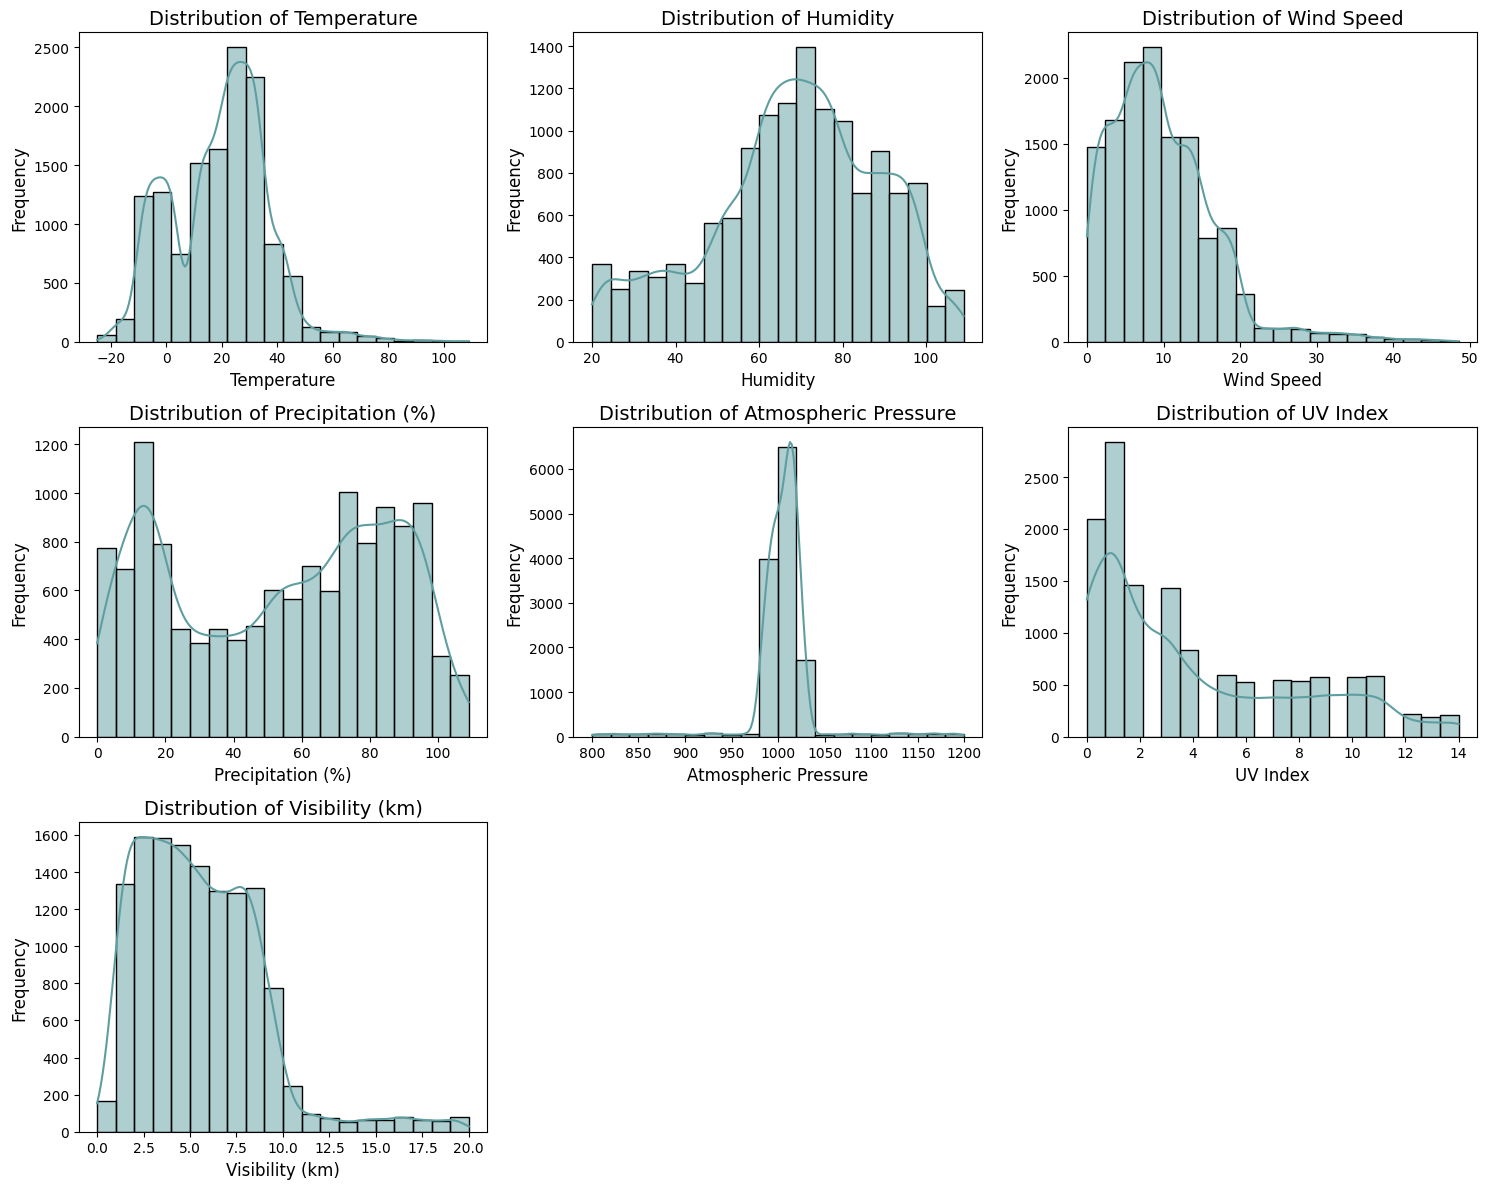

In [17]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

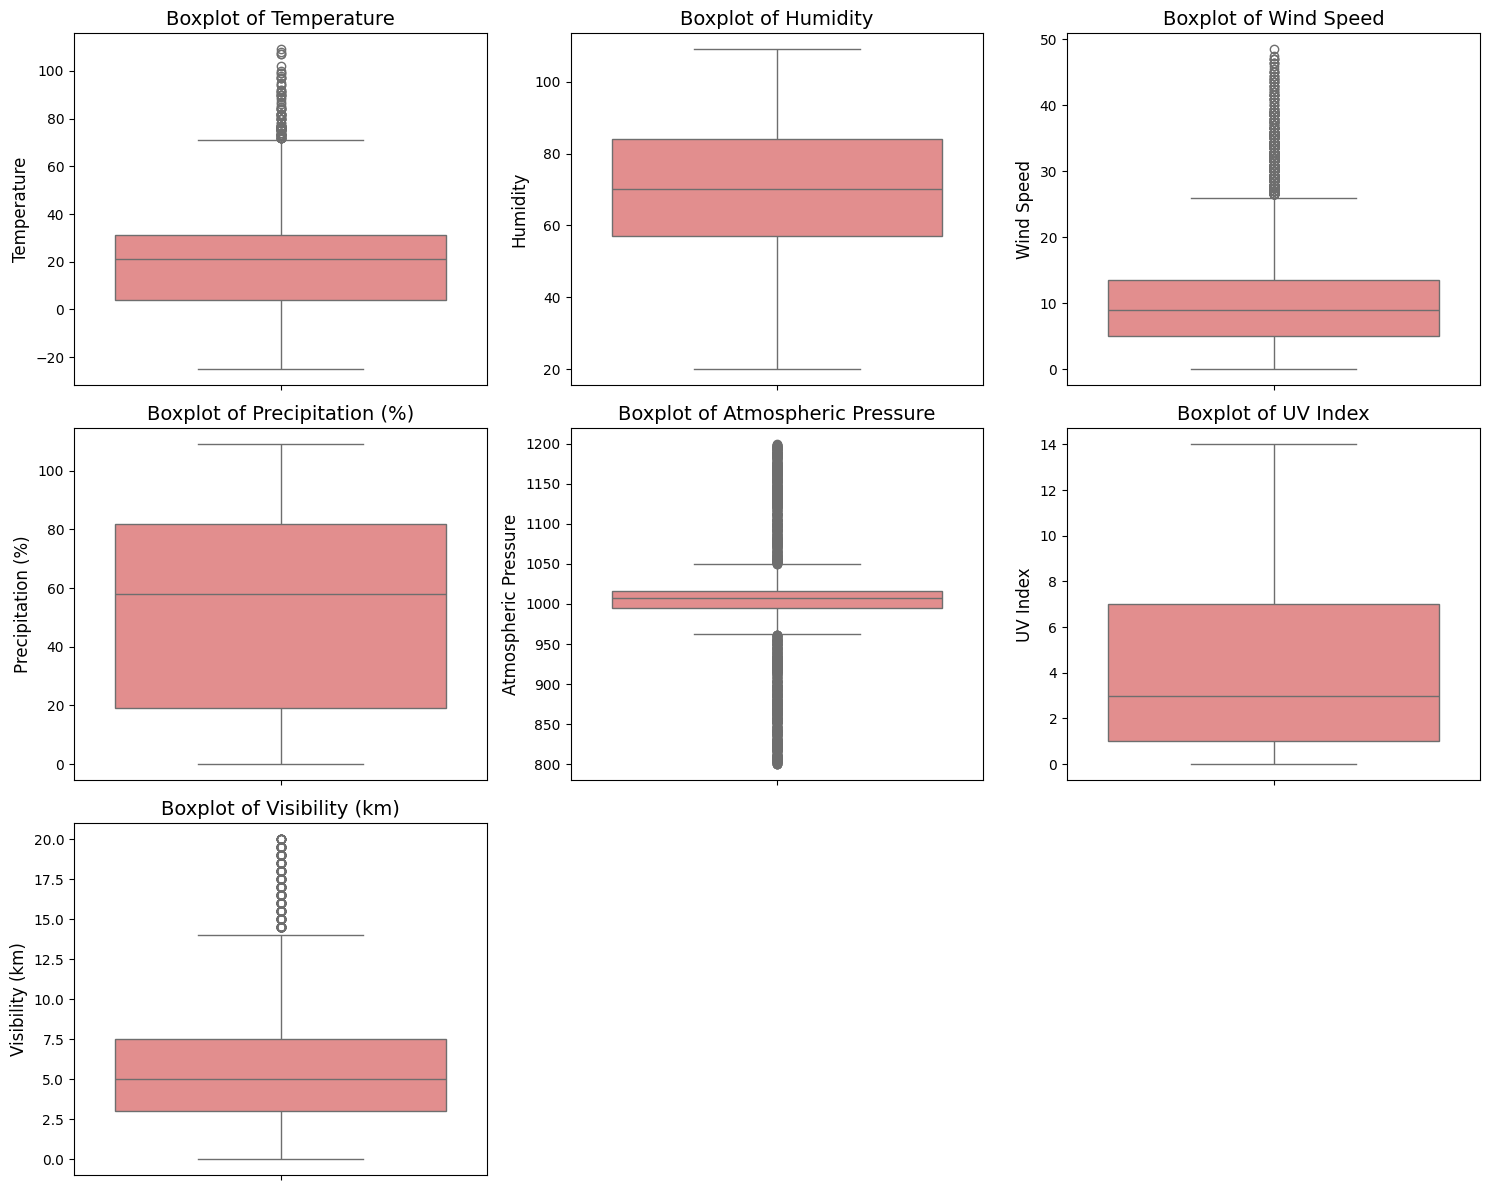

In [18]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

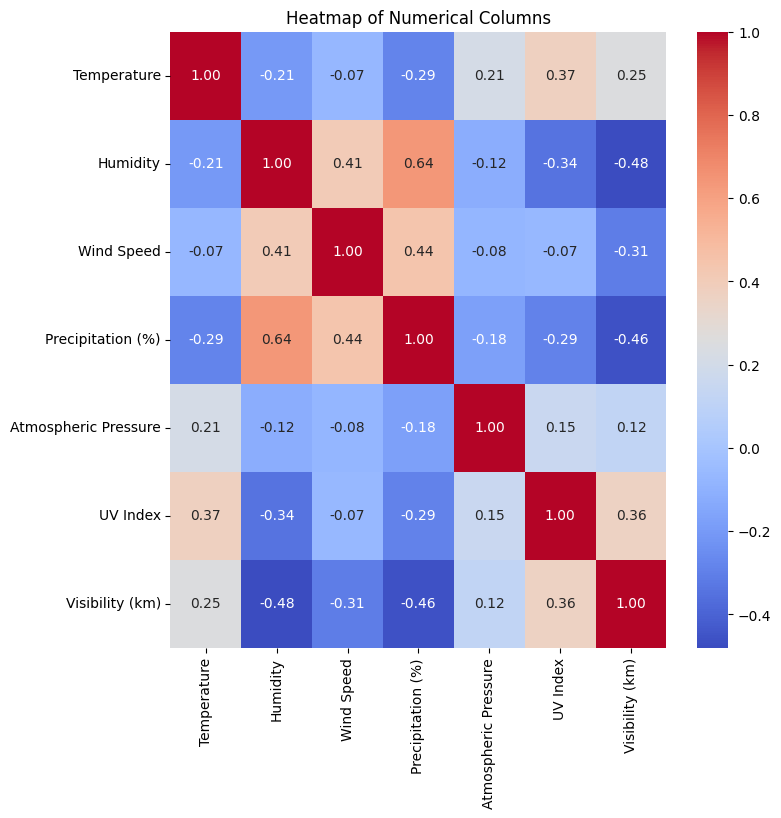

In [22]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

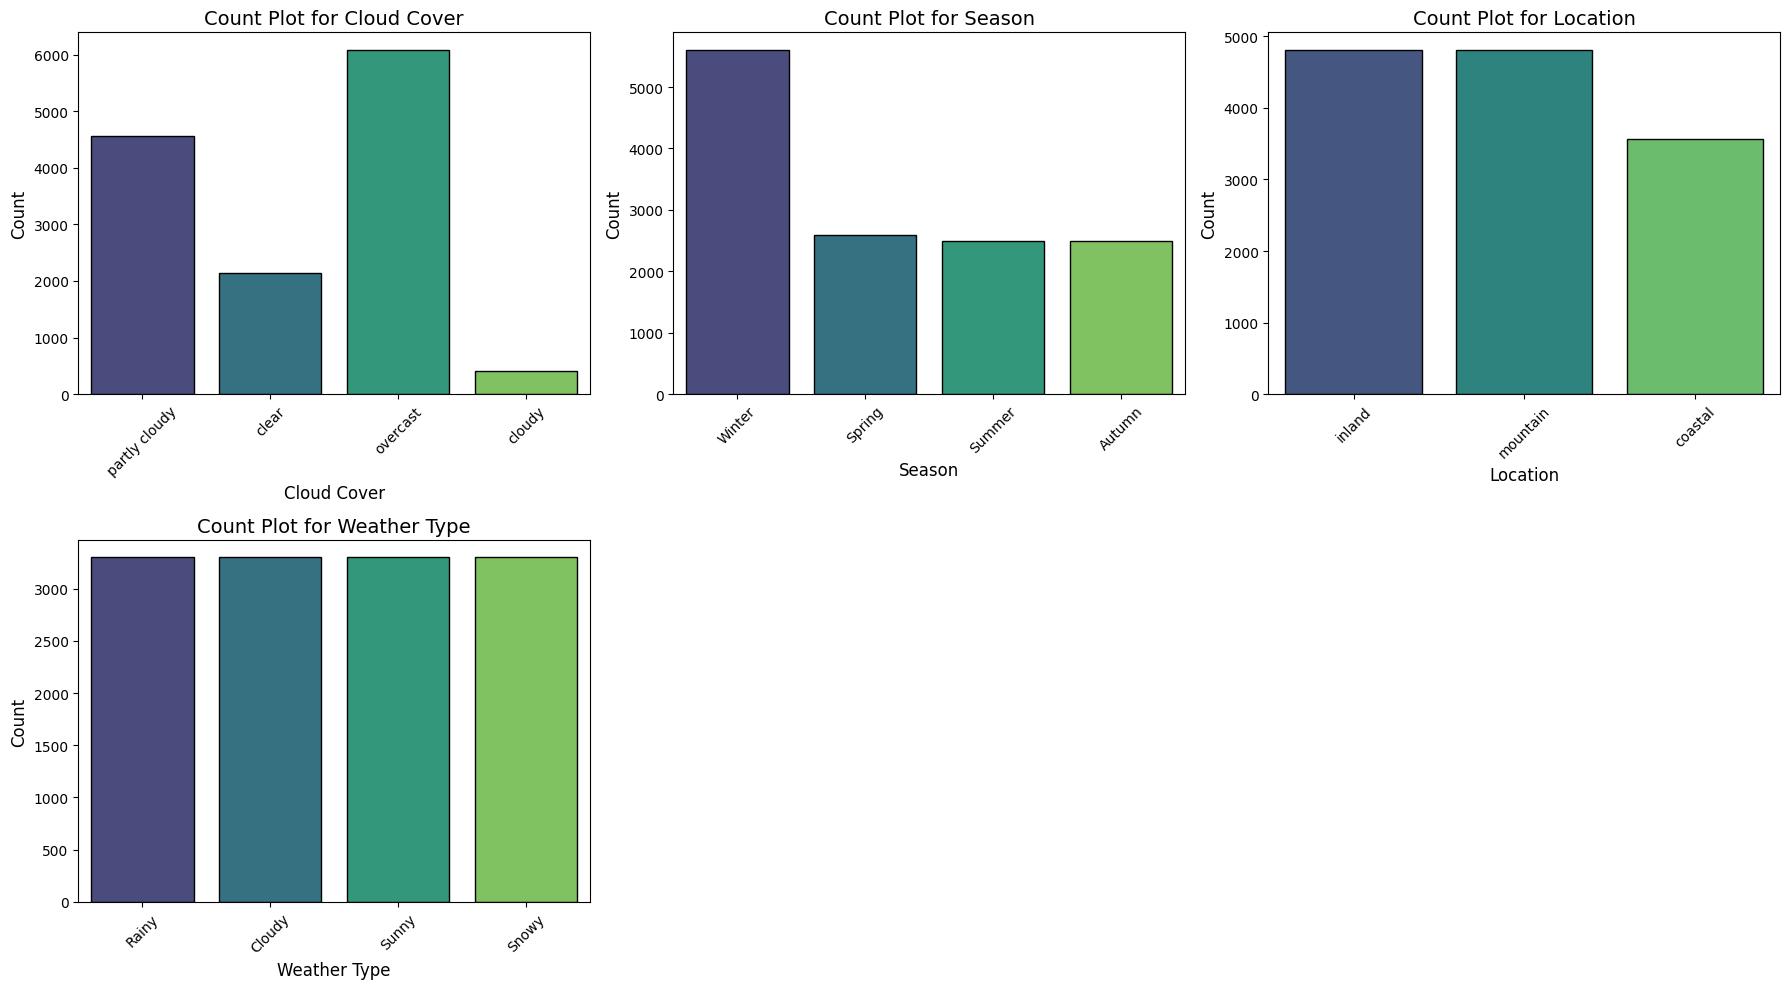

In [23]:
# Plotting each categorical column as a count plot

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_title(f"Count Plot for {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [25]:
df = df.drop(['Atmospheric Pressure'], axis =1)

In [24]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [26]:
X = df.drop(['Weather Type'], axis=1)
y = df['Weather Type']

In [27]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [28]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [30]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8446969696969697, 0.7935606060606061, 0.9094696969696969, 0.9083333333333333, 0.8625, 0.9, 0.9049242424242424, 0.896969696969697, 0.8920454545454546]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       651
           1       0.83      0.83      0.83       647
           2       0.90      0.94      0.92       701
           3       0.86      0.80      0.83       641

    accuracy                           0.84      2640
   macro avg       0.84      0.84      0.84      2640
weighted avg       0.84      0.84      0.84      2640

Confusion Matrix:
 [[525  62  18  46]
 [ 43 536  43  25]
 [ 23   5 658  15]
 [ 75  42  13 511]]


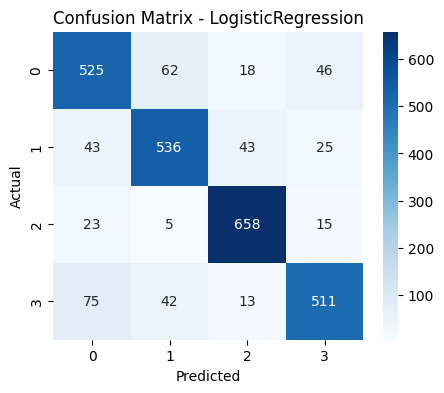

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       651
           1       0.80      0.75      0.77       647
           2       0.81      0.94      0.87       701
           3       0.84      0.72      0.77       641

    accuracy                           0.79      2640
   macro avg       0.79      0.79      0.79      2640
weighted avg       0.79      0.79      0.79      2640

Confusion Matrix:
 [[492  74  38  47]
 [ 37 484  99  27]
 [ 20   8 656  17]
 [121  39  18 463]]


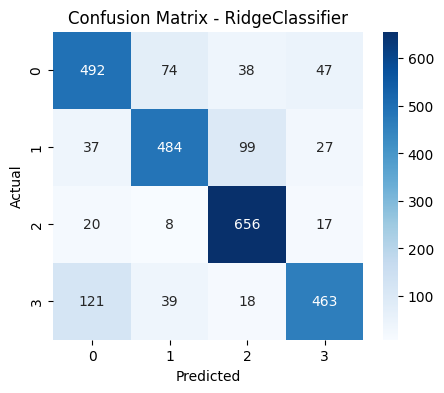

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       651
           1       0.91      0.89      0.90       647
           2       0.93      0.95      0.94       701
           3       0.92      0.89      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Confusion Matrix:
 [[586  34  15  16]
 [ 37 579  12  19]
 [ 14  10 664  13]
 [ 34  14  21 572]]


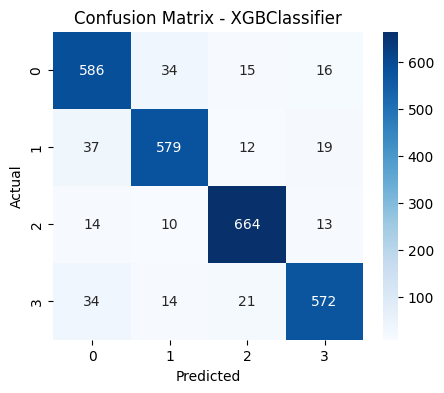

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       651
           1       0.90      0.91      0.90       647
           2       0.93      0.94      0.93       701
           3       0.94      0.88      0.91       641

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Confusion Matrix:
 [[582  35  17  17]
 [ 38 587  13   9]
 [ 17  12 661  11]
 [ 36  19  22 564]]


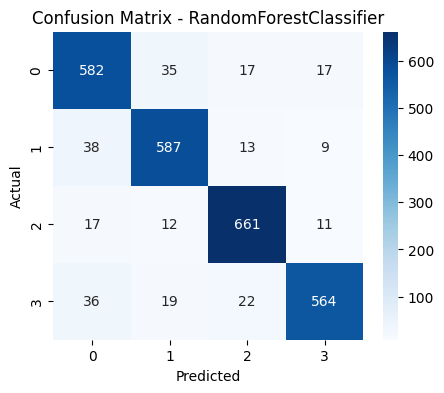

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       651
           1       0.82      0.91      0.86       647
           2       0.90      0.95      0.92       701
           3       0.99      0.76      0.86       641

    accuracy                           0.86      2640
   macro avg       0.87      0.86      0.86      2640
weighted avg       0.87      0.86      0.86      2640

Confusion Matrix:
 [[543  81  25   2]
 [ 29 587  29   2]
 [ 18  19 663   1]
 [104  31  22 484]]


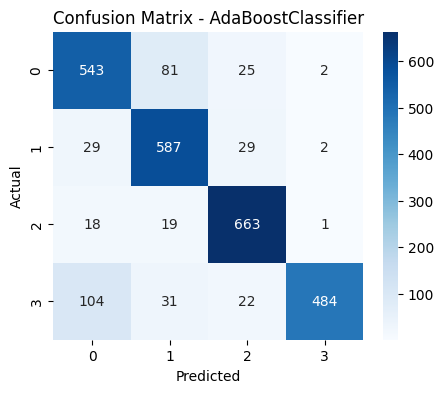

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       651
           1       0.88      0.89      0.89       647
           2       0.92      0.95      0.94       701
           3       0.93      0.88      0.90       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

Confusion Matrix:
 [[569  46  19  17]
 [ 43 577  15  12]
 [ 13   8 667  13]
 [ 35  22  22 562]]


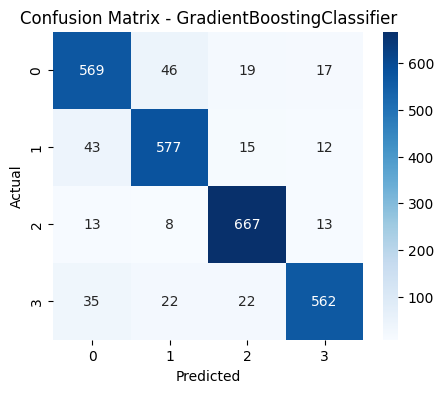

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       651
           1       0.89      0.88      0.89       647
           2       0.93      0.94      0.94       701
           3       0.92      0.88      0.90       641

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

Confusion Matrix:
 [[576  37  17  21]
 [ 47 572  14  14]
 [ 13  14 661  13]
 [ 37  21  19 564]]


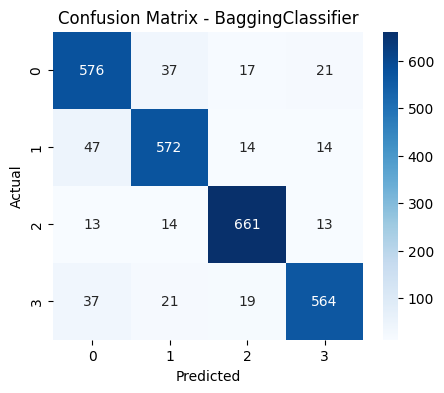

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       651
           1       0.90      0.88      0.89       647
           2       0.92      0.94      0.93       701
           3       0.90      0.89      0.89       641

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

Confusion Matrix:
 [[564  36  20  31]
 [ 45 570  13  19]
 [ 18  11 659  13]
 [ 32  14  26 569]]


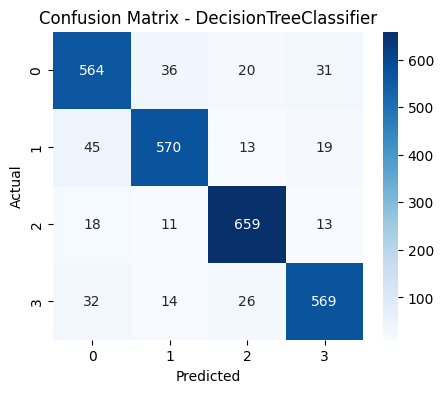

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       651
           1       0.88      0.89      0.89       647
           2       0.92      0.95      0.94       701
           3       0.90      0.86      0.88       641

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640

Confusion Matrix:
 [[562  39  16  34]
 [ 32 574  25  16]
 [ 13   6 669  13]
 [ 45  30  16 550]]


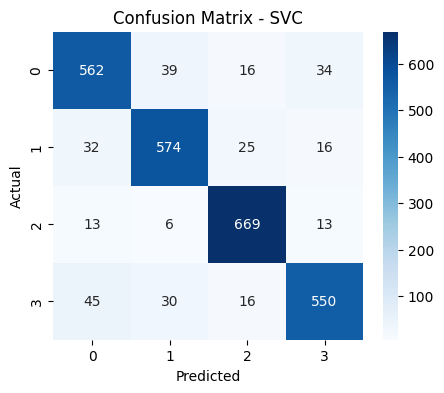

In [32]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()